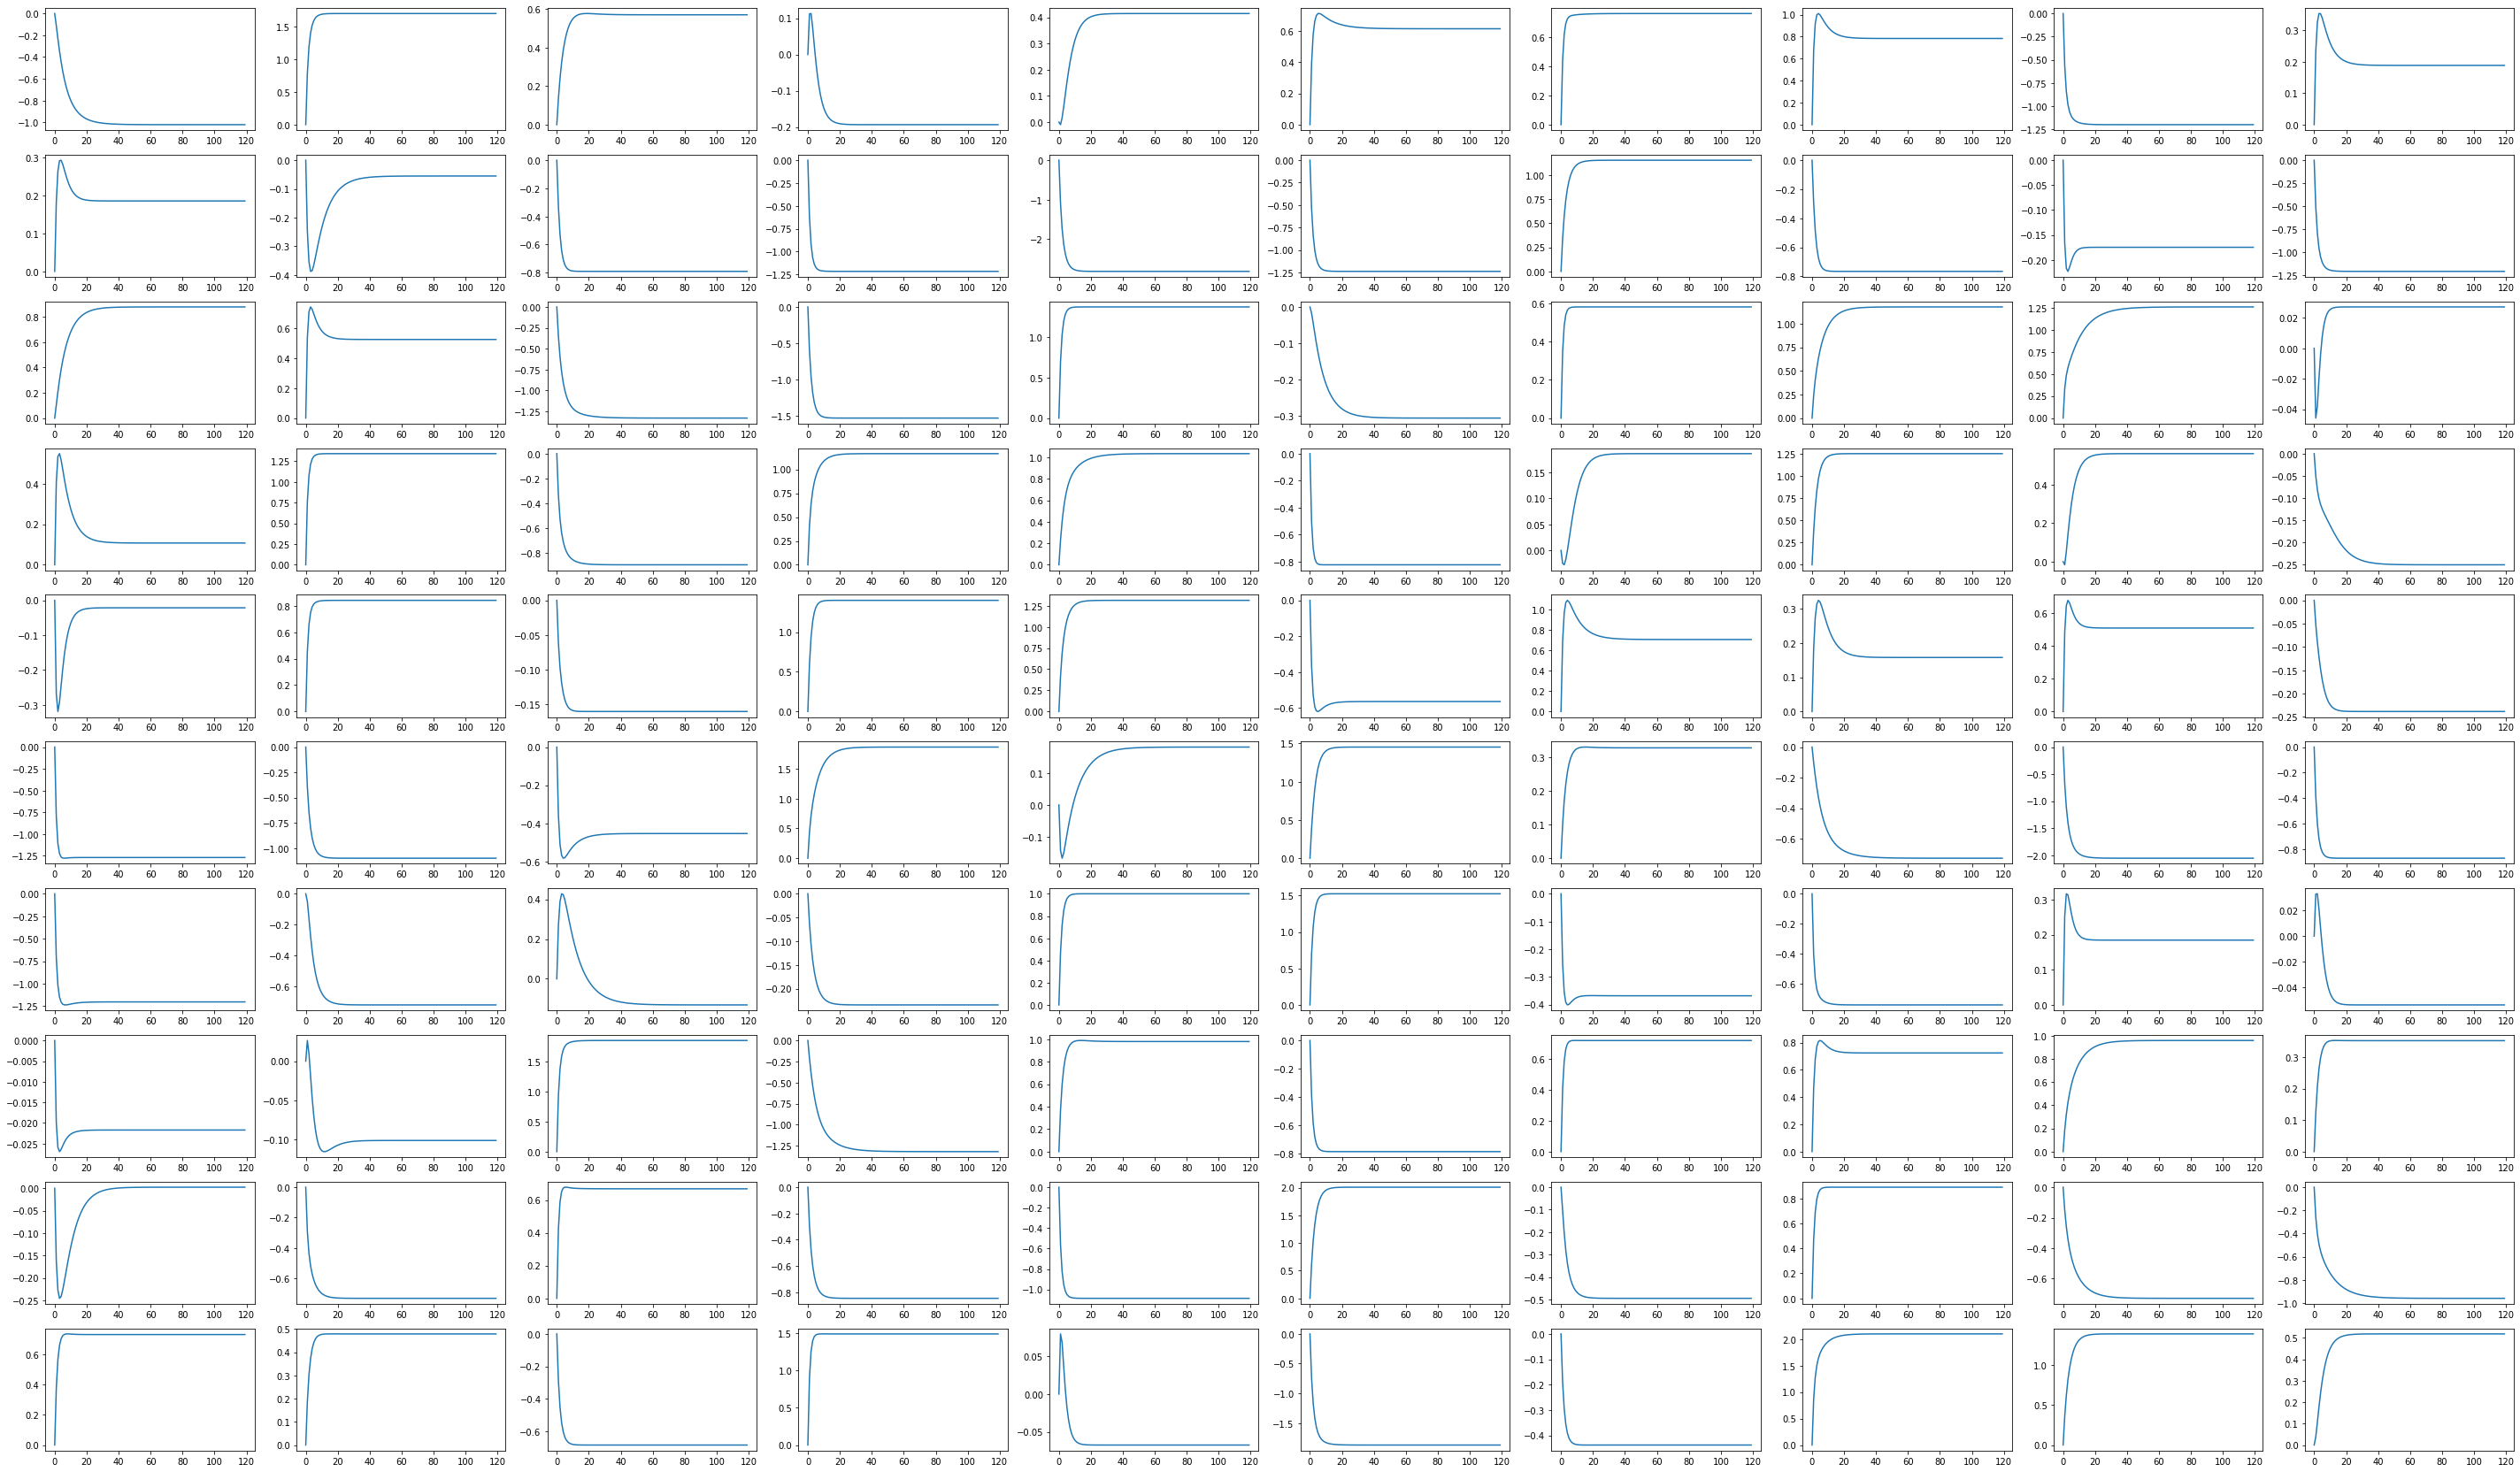

In [1]:
import math
import numpy as np
import random as rnd
import plotly.express as px
import matplotlib.pyplot as plt

def gein_gen():    
    c = [rnd.uniform(-1., 1.) for i in range(3)]
    k = [rnd.uniform(-1., -0.1) for i in range(3)]
    c0 = sum(c)
    y = []
    for i in range(120):
        _y = sum([-c0] + [_c * math.exp(_k * i) for _c, _k in zip(c, k)])
        y.append(_y)    
    return y

def gains_gen(n, m):
    result = []
    for i in range(n):
        _result = []
        for j in range(m):
            _result.append(gein_gen())
        result.append(_result)
    return result

H = gains_gen(30, 30)
num_cv, num_mv = 10, 10

fig, axs = plt.subplots(num_cv, num_mv, figsize=(50, 30))
for i in range(num_cv):
    for j in range(num_mv):
        axs[i, j].plot(H[i][j])
plt.show()

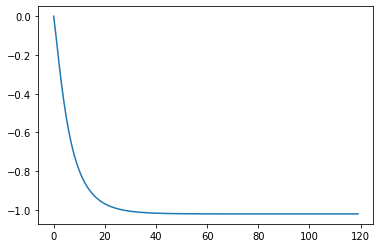

In [19]:
h_sample = H[0][0]
plt.plot(h_sample)

In [20]:
import math
from scipy.optimize import minimize

pred = lambda c, k, t: sum([_c * (1 - math.exp(-_k * t )) for _c, _k in zip(c, k)])
err = lambda par: sum([(h_sample[i] - pred(par[:3], par[3:], i)) ** 2 for i in range(len(h_sample))])
x0 = [*[1, 1, 1], *[1, 1, 1]]
res = minimize(fun=err,
               x0=x0)
param_estim = res['x'].tolist()
param_estim

C:\Users\User\AppData\Local\Temp/ipykernel_10140/3563793708.py:5: RuntimeWarning: overflow encountered in double_scalars
  err = lambda par: sum([(h_sample[i] - pred(par[:3], par[3:], i)) ** 2 for i in range(len(h_sample))])
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


[-0.34043045275630957,
 -0.34043044635913805,
 -0.34037979659933126,
 0.14764825300069867,
 0.1476482532290684,
 0.14764847462742067]

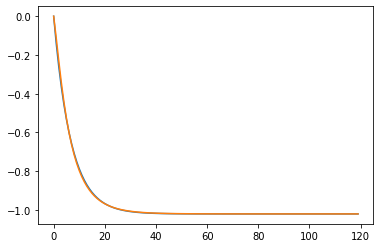

In [21]:
h_estim = [pred(param_estim[:3], param_estim[3:], i) for i in range(len(h_sample))]

plt.plot(h_estim)
plt.plot(h_sample)
plt.show()